# Data Wrangling, Descriptive Statistics, Exploring Different Regression Models, and Building the Pipeline in Scikit-Learn
**Tools used:** pandas, numpy, seaborn, matplotlib, scipy, scikit-learn;
<br>**Statistical methods used:** Pearson correlation coefficient and its statistical significance (p-value), box-plots, heat map for categorical variables, ANOVA;  
**Types of regression models explored:** simple (one variable) linear regression, multiple linear regression,  polynomial regression;
<br> **Methods of model quality evaluation:** mean squared error (MSE), determination coefficient (R squared), QQ-plot, distribution (kernel density) plot.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [107]:
#machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading Raw Data

In [108]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header = None)

In [109]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [110]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# First Insight of Dataset's Quality

In [112]:
# checking on data types (some datatypes need to be corrected)
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [113]:
# replacing ? to NaN numpy values for the whole dataframe 
df.replace('?',np.NaN,inplace = True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [115]:
df.isnull().sum().sum() # total number of NaN values in the dataframe

59

In [116]:
df.isnull().sum() # number of NaN values in each column

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Data Wrangling

### Deleting rows with missing data (NaN) in the 'price' column (our target/label to make predictions on)

In [117]:
df.dropna(subset = ["price"], inplace = True) # dropping rows which have NaN value in the column 'price'

In [118]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

### Replacing mising data by mean in the following columns: "normalized-losses", "stroke","bore","horsepower","peak-rpm" 

In [119]:
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype('float').mean(), inplace = True)

In [120]:
df["stroke"].replace(np.nan, df["stroke"].astype('float').mean(), inplace = True)

In [121]:
df["bore"].replace(np.nan, df["bore"].astype('float').mean(), inplace = True)

In [122]:
df["horsepower"].replace(np.nan, df["horsepower"].astype('float').mean(), inplace = True)

In [123]:
df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype('float').mean(), inplace = True)

### Replacing missing values by frequency in "num-of-doors" attribute 

In [124]:
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [125]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [126]:
# checking that there are no missing values in the entire dataframe and
# data cleansing is finished
df.isnull().sum().sum() # total number of NaN values in the dataframe

0

### Changing incorrect datatypes in dataframe

In [127]:
df.dtypes # checking on data types

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [128]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

In [129]:
df.to_csv('automobile.csv', index = False) # saving cleaned dataset as .csv

# Basic Exploratory Analysis of Dataset

In [130]:
df.describe() # some statistical information on numerical data types

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [131]:
df.describe(exclude=[np.number]) # statistics on non-numeric data types (some of the attributes have wrong data type)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


In [132]:
df[['length', 'compression-ratio']].describe() # statistice for length and compression-ratio features

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


# Data Standardization and Normalization

In [133]:
# converting mpg (Miles per gallon) to liter/100km
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

In [134]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704


In [135]:
# normalization of features"length", "width" and "height"
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# Binning Data
 (transforming continuous numerical variables into discrete categorical 'bins')

In [136]:
df["horsepower"]=df["horsepower"].astype(int, copy=True) # converting to int

Text(0.5, 1.0, 'horsepower bins')

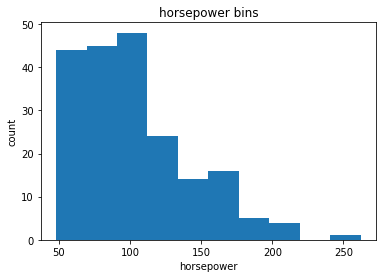

In [137]:
plt.hist(df["horsepower"])
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [138]:
#Let's change bin width of histogram
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )



In [139]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

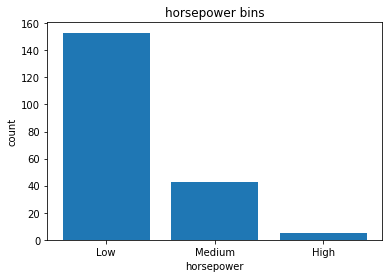

In [140]:
#bar plot
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

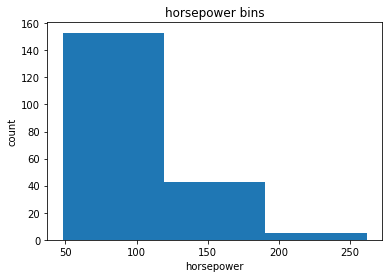

In [141]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

# Indicator Variable (or Dummy Variable) for 'fuel-type' and 'aspiration' attributes
(to use it in machine learning models, e.g. in linear regression)

In [142]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head(2)

,diesel,gas
0,0,1
1,0,1


In [143]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head(2)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1


In [144]:
# concatenating dummy variables with a data frame
df = pd.concat([df, dummy_variable_1], axis=1)
# removing column "fuel-type"
df.drop("fuel-type", axis = 1, inplace=True)

In [145]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis = 1, inplace=True)

In [146]:
df.to_csv('automobile_normalized.csv', index = False) # saving cleaned dataset as .csv

# Descriptive Statistics

### Correlations between continous variables

In [147]:
# pearson correlation matrix for 4 attributes
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


(0.0, 53480.43039392989)

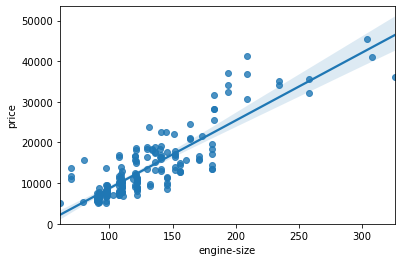

In [148]:
#  scatterplot with fitted line
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [149]:
df[["engine-size", "price"]].corr() # engine-size looks like a good predictor for the price

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

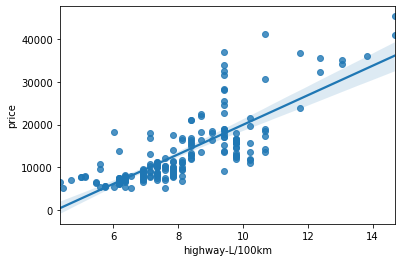

In [150]:
sns.regplot(x="highway-L/100km", y="price", data=df)

In [151]:
df[["highway-L/100km", "price"]].corr() # "highway-L/100km" is also a good predictor

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

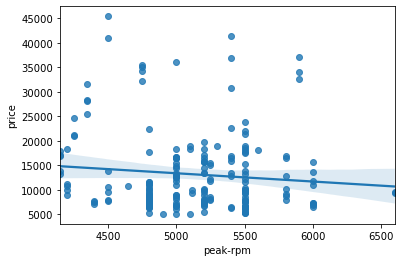

In [152]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [153]:
df[["peak-rpm", "price"]].corr() #it seems that "peak-rpm" is not a good predictor

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


In [154]:
df[['stroke', 'price']].corr() # stroke is good predictor

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


### Analysis of categorical variables

<AxesSubplot:xlabel='body-style', ylabel='price'>

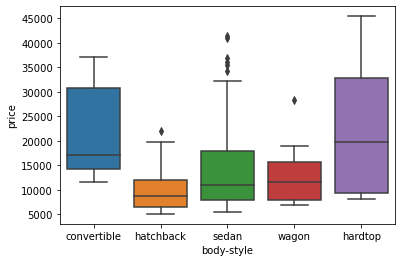

In [155]:
# boxplot
sns.boxplot(x="body-style", y="price", data=df) #"body-style" is a bad predictor

<AxesSubplot:xlabel='engine-location', ylabel='price'>

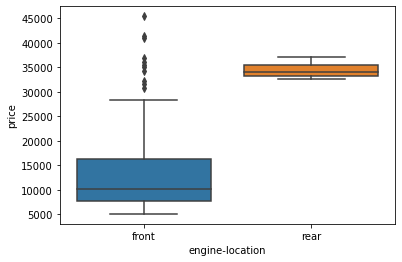

In [156]:
sns.boxplot(x="engine-location", y="price", data=df) # "engine-location" is a good predictor

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

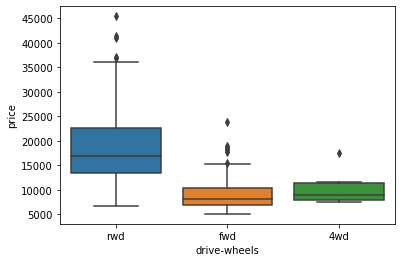

In [157]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Text(0.5, 1.0, "value_counts of categorical variable 'drive-wheels'")

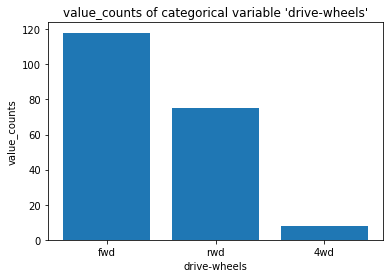

In [158]:
# analysis of frequency of values of categorical variable
#bar plot indicates that 'drive_wheels' can be used as predictor
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
plt.bar(drive_wheels_counts.index.values,drive_wheels_counts['value_counts'] )
plt.xlabel('drive-wheels')
plt.ylabel('value_counts')
plt.title("value_counts of categorical variable 'drive-wheels'")

Text(0.5, 1.0, "value_counts of categorical variable 'engine-location'")

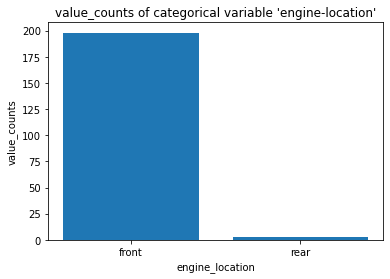

In [159]:
# example of a bad predictor; the categorical variable is skewed towards one value
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
plt.bar(engine_loc_counts.index.values,engine_loc_counts['value_counts'] )
plt.xlabel('engine_location')
plt.ylabel('value_counts')
plt.title("value_counts of categorical variable 'engine-location'")

### Grouping data and Pivot Tables

In [160]:
df['drive-wheels'].unique() # all distinct values (factors) of categorical variable

array(['rwd', 'fwd', '4wd'], dtype=object)

Text(0.5, 1.0, "average price for every kind of 'drive-wheels'")

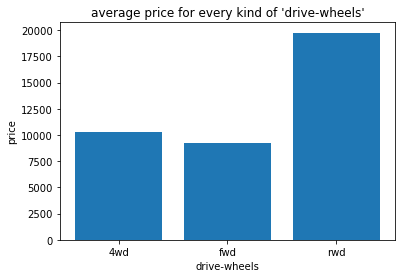

In [161]:
df_group_one = df[['drive-wheels','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
plt.bar(df_group_one['drive-wheels'],df_group_one['price'] )
plt.xlabel('drive-wheels')
plt.ylabel('price')
plt.title("average price for every kind of 'drive-wheels'")

Text(0.5, 1.0, "average price for every kind of 'body-style'")

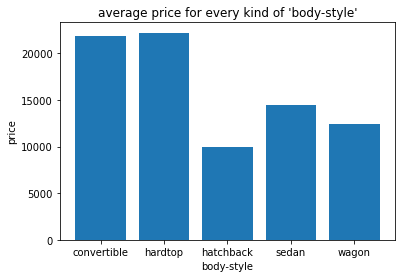

In [162]:
df_group_two = df[['body-style','price']]
df_group_two = df_group_two.groupby(['body-style'],as_index=False).mean()
plt.bar(df_group_two['body-style'],df_group_two['price'] )
plt.xlabel('body-style')
plt.ylabel('price')
plt.title("average price for every kind of 'body-style'")

In [163]:
#grouping by two categorical variables
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot # pivot table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

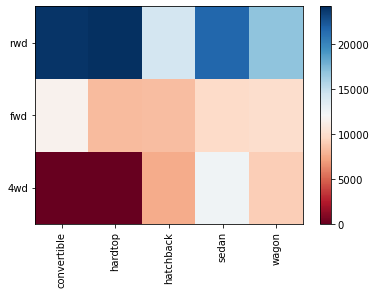

In [164]:
# using the grouped results let's plot heat map to see 
# the relationship between Body Style vs Price.
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Pearson correlation and its statistical significance (p-value)
(to choose from all the variables those which would be a good predictors for the target variable ('price') in linear regression)

In [165]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [166]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593172e-48


In [167]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


In [168]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


In [169]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


In [170]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [171]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441016e-17


In [172]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


In [173]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


<AxesSubplot:>

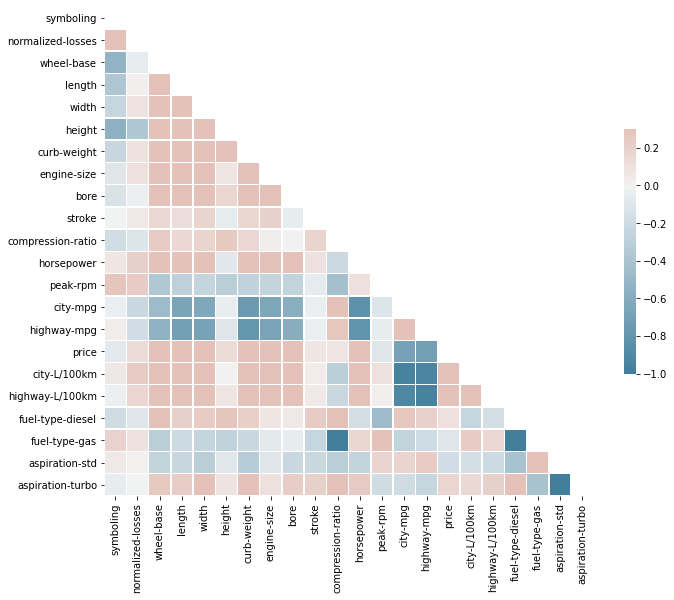

In [174]:
#plotting correlation matrix using heat plot
# Generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [175]:
#correlation matrix
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


# ANOVA: Analysis of Variance
(If our price variable is strongly correlated with the categorical variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value)

In [176]:
df['drive-wheels'].unique() # 3 groups 

array(['rwd', 'fwd', '4wd'], dtype=object)

In [177]:
# grouping for anova analysis
grouped_test2 = df[['drive-wheels', 'price']].groupby(['drive-wheels'])

In [178]:
#ANOVA analysis of three groups
#P-value indicates that the average prices are different hence 'drive-wheels' is a good predictor
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],\
grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


# Summary of good predictors

Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

Categorical variables:

Drive-wheels

# Models Development

## 1. Linear Regression and Multiple Linear Regression

### 1.1. Simple Linear Regression

In [210]:
lm1 = LinearRegression() #linear regression object
X = df[['highway-mpg']] # predictor variable
Y = df['price'] # response variable
lm1.fit(X,Y)
# predicted values
Y_pred = lm1.predict(X)
# linear regression equation
print("price = {} + {} * highway-mpg".format(lm1.intercept_, lm1.coef_))

price = 38423.305858157415 + [-821.73337832] * highway-mpg


In [211]:
# Coefficient of determination R^2
print('The R-square is: ', lm1.score(X, Y))

The R-square is:  0.4965911884339176


In [212]:
# Mean Squared Error
mse = mean_squared_error(df['price'], Y_pred)
print('The mean square error of price and predicted value is: ',"{:.3e}".format(mse))

The mean square error of price and predicted value is:  3.164e+07


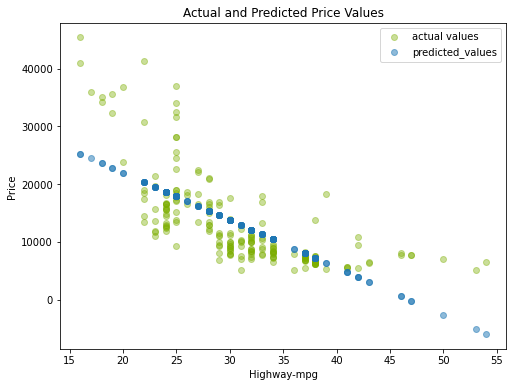

In [249]:
# two scatter plots (actual price vs highway-mpg) and (predicted price vs highway-mpg)
plt.figure(figsize=(8,6))
plt.scatter(x = X, y = Y, c = "#7CAE00", alpha = 0.4)
plt.scatter(x = X, y = Y_pred, alpha = 0.5)
plt.legend(labels = ["actual values", "predicted_values"])
plt.title('Actual and Predicted Price Values')
plt.ylabel('Price')
plt.xlabel('Highway-mpg')
plt.show()

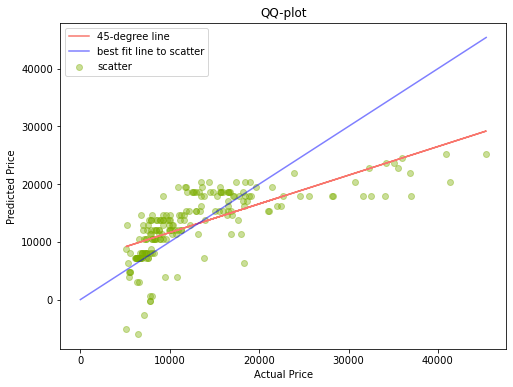

In [262]:
# QQ-plot (predicted values against actual values)
plt.figure(figsize=(8,6))

plt.scatter(x = Y, y = Y_pred, c = "#7CAE00", alpha = 0.4)
# best fit line to compare with 45 degree line
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y,p(Y),"#F8766D")
# 45 degree line
max_val = max(max(Y),max(Y_pred))
plt.plot([1, max_val], [1, max_val], c ='blue',  alpha = 0.5)

plt.title('QQ-plot')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.legend(labels = ['45-degree line','best fit line to scatter', 'scatter'])
plt.show()

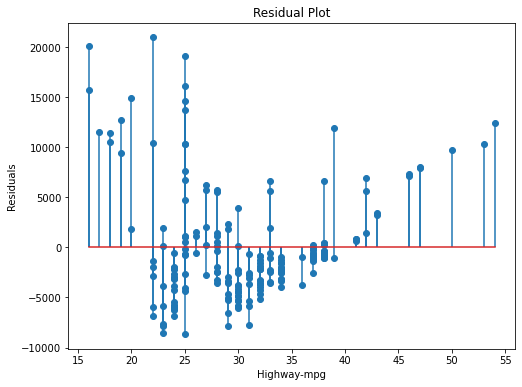

In [255]:
# residual plot
plt.figure(figsize=(8,6))
plt.stem(X.to_numpy(), (Y - Y_pred).to_numpy())
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Highway-mpg')
plt.show()

### 1.2. Linear regression plot in seaborn package


Text(0.5, 1.0, 'Simple Linear Regression Scatter Plot')

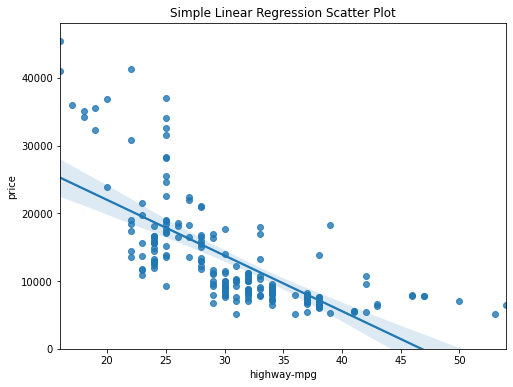

In [184]:

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title('Simple Linear Regression Scatter Plot')

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

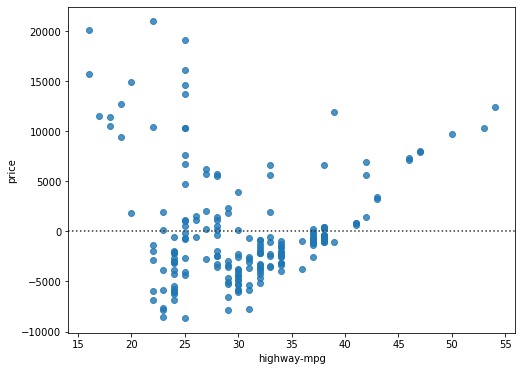

In [185]:
# residual plot in seaborn (e_i = y_predicted_i - y_data_i)
# res plot shows that linear model is not appropriate for the data
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x = 'highway-mpg', y = 'price', data = df)


### 1.3. Multiple Linear Regression

In [186]:
predictors = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
target = df['price']
lm2 = LinearRegression()
lm2.fit(predictors, target)
#linear regression equation
print("price = {} + {} * 'horsepower' + {} * \n'curb-weight' + {} \
* 'engine-size' + {} * highway-mpg".format(lm2.intercept_, *lm2.coef_))

price = -15831.930960299476 + 53.662473172532614 * 'horsepower' + 4.709386939614349 * 
'curb-weight' + 81.44600166887584 * 'engine-size' + 36.55016267272949 * highway-mpg


In [187]:
# Coefficient of determination R^2
print('The R-square is: ', lm2.score(predictors, target))

The R-square is:  0.80943904228153


In [188]:
# Mean Squared Error
mse = mean_squared_error(df['price'], lm2.predict(predictors))
print('The mean square error of price and predicted value is: ',"{:.3e}".format(mse))

The mean square error of price and predicted value is:  1.198e+07


Text(0, 0.5, 'Proportion of Cars')

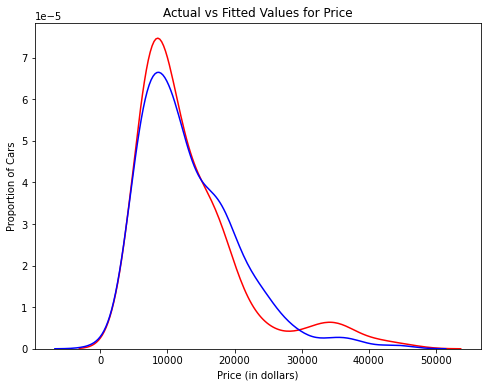

In [190]:
#distribution plot (comparing emperical pdf of the predicted and the training data)
y_predict = lm2.predict(predictors) # predictions made by the linear model
width = 8
hight = 6
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(y_predict, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

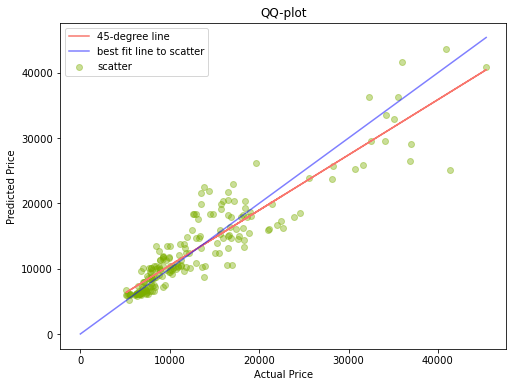

In [261]:
#plot linear regression (see BioStatLectures) !!!
# QQ-plot (predicted values against actual values)
plt.figure(figsize=(8,6))

plt.scatter(x = df['price'], y = y_predict, c = "#7CAE00", alpha = 0.4)
# best fit line to compare with 45 degree line
z = np.polyfit(df['price'], y_predict, 1)
p = np.poly1d(z)
plt.plot(df['price'], p(df['price']),"#F8766D")
#45 degree line
max_val = max(max(df['price']),max(y_predict))
plt.plot([1, max_val], [1, max_val], c ='blue',  alpha = 0.5)

plt.title('QQ-plot')
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.legend(labels = ['45-degree line','best fit line to scatter', 'scatter'])
plt.show()

## 2. Polynomial Regression 

### 2.1. One Variable Polynomial Regression in NumPy

In [285]:
x = df['highway-mpg']
y = df['price']
# polynomial of the 3rd order (cubic) 
coef = np.polyfit(x, y, 3)
p = np.poly1d(coef)  # returns polynomial function with estimated coefficients
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [286]:
# Coefficient of determination R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [287]:
# Mean Squared Error
mse = mean_squared_error(y, p(x))
print('The mean square error of price and predicted value is: ',"{:.3e}".format(mse))

The mean square error of price and predicted value is:  2.047e+07


In [194]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    # This function plots polynomial line fitted to the data
    
    x_new = np.linspace(15, 55, 100) 
    y_new = model(x_new) # Generating data using the polynomial model

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for 'price' ~ '{}'".format(Name))
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

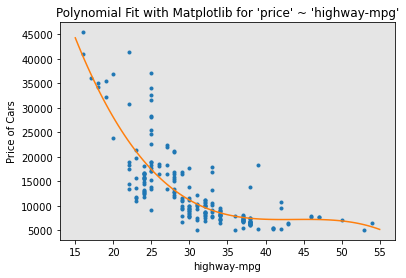

In [274]:
PlotPolly(p, x, y, 'highway-mpg')

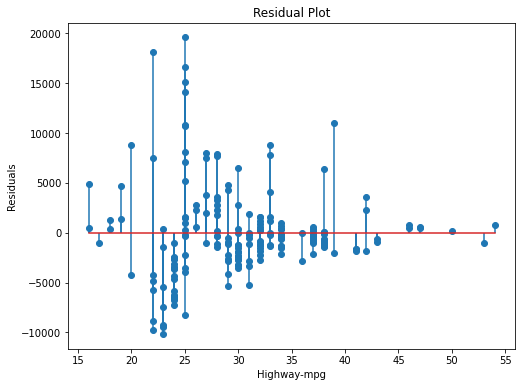

In [288]:
# residual plot
plt.figure(figsize=(8,6))
plt.stem(x.to_numpy(), y - p(x))
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Highway-mpg')
plt.show()

### 2.2 Multivariate Polynomial Regression in Scikit-Learn

In [197]:
# Standardize features by removing the mean and scaling to unit variance
scale = StandardScaler()
scaled_predictors = scale.fit_transform(predictors)

In [198]:
scaled_predictors.shape # 201 samples and 4 features

(201, 4)

In [199]:
# Transforms features for Polynomial Regression
pr = PolynomialFeatures(degree=2, include_bias=False) 
transformed_scaled_predictors = pr.fit_transform(predictors) 
transformed_scaled_predictors.shape # 201 samples and 15 features

(201, 14)

In [200]:
# Using Multivariable Linear Regression
lm3 = LinearRegression()
lm3.fit(transformed_scaled_predictors, target)

LinearRegression()

Text(0, 0.5, 'Proportion of Cars')

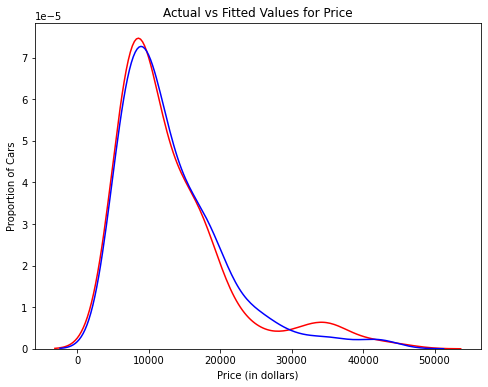

In [202]:
#distribution plot (comparing emperical pdf of the predicted and the training data)
y_predict = lm3.predict(transformed_scaled_predictors) # predictions made by the linear model
width = 8
hight = 6
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(y_predict, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

## 3. Smplifying  Steps of Processing the Data (scaling, transforming, fitting the model) Using the Pipeline in Scikit-Learn

In [203]:
# Building the pipeline
Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [204]:
# Normalizing the data, performing a transform and fittung the model simultaneously
pipe.fit(predictors, target) 

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [205]:
# Normalizing the data, performing a transform and producing a prediction simultaneously
pipe_prediction  = pipe.predict(predictors)

In [206]:
# Coefficient of determination R^2
r_squared = r2_score(target, pipe_prediction)
print('The R-square value is: ', r_squared)

The R-square value is:  0.8463532062347514


In [207]:
# Mean Squared Error
mse = mean_squared_error(target, pipe_prediction)
print('The mean square error of price and predicted value is: ',"{:.3e}".format(mse))

The mean square error of price and predicted value is:  9.655e+06


Text(0, 0.5, 'Proportion of Cars')

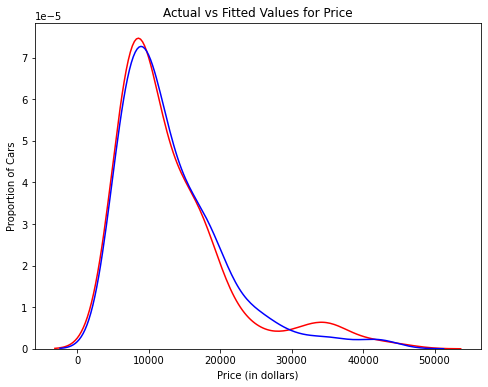

In [208]:
#distribution plot (comparing emperical pdf of the predicted and the training data)
y_predict = pipe_prediction 
width = 8
hight = 6
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(y_predict, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')